In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df_ = pd.read_csv("Desktop/titanic.csv")
df = df_.copy()
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# Satır ve Sütun sayısı kontrol edelim
df.shape

(1310, 14)

In [3]:
# Sütun başlıklarına bakalım
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
# Sütunların türlerini kontrol ediyorum
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
# Sütunların eksik değerlerini kontrol ediyorum
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [6]:
# Age ve Survived sütununu medyan ile dolduruyorum.
df['age'] = df['age'].fillna(df['age'].median())
df['survived'] = df['survived'].fillna(df['survived'].median())
# Embarked (varış yerleri) en çok tekrar edenle dolduruyorum.
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Kabin kısmında çok fazla eksik değer olduğu için siliyorum.
df.drop(columns='cabin', inplace=True)

In [7]:
# Grafiklerin Türkçe karakterlerde sorun çıkarmaması için:
plt.rcParams['font.family'] = 'Arial'

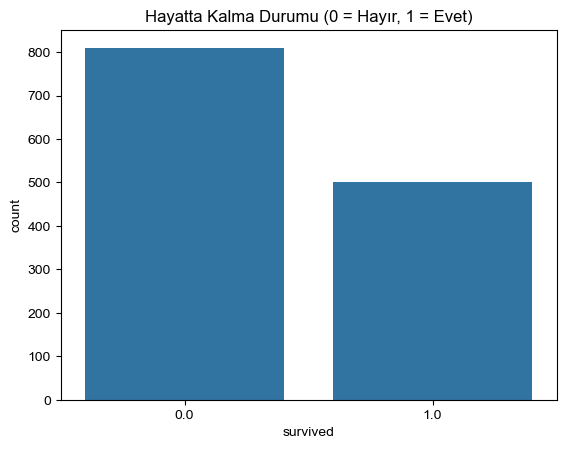

In [8]:
# Hayatta kalanlara genel bakıyorum
sns.countplot(data =df, x='survived')
plt.title('Hayatta Kalma Durumu (0 = Hayır, 1 = Evet)')
plt.show()

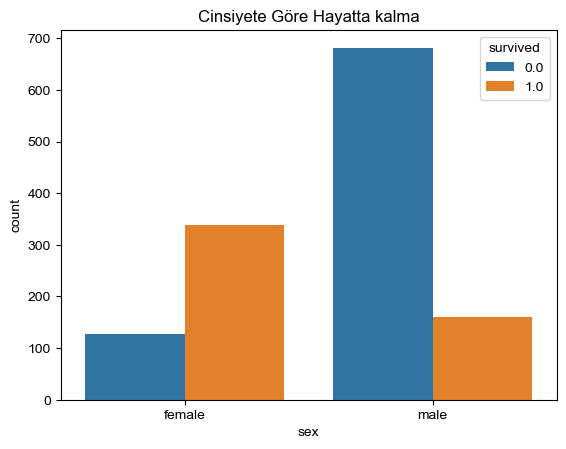

In [9]:
# Cinsiyet'e göre hayatta kalanlara bakıyorum
sns.countplot(data = df, x='sex', hue='survived')
plt.title('Cinsiyete Göre Hayatta kalma')
plt.show()

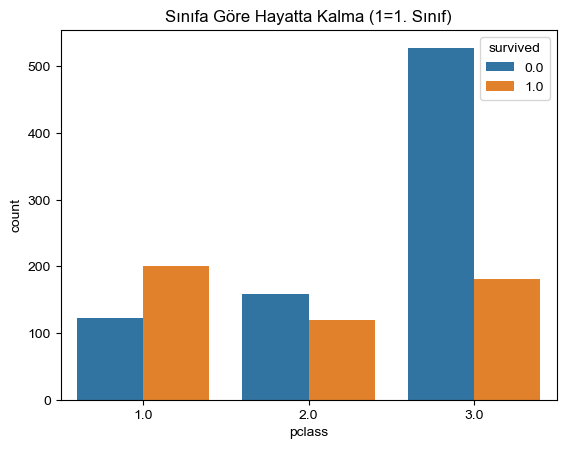

In [10]:
# Sınıfa göre hayatta kalma
sns.countplot(data = df, x='pclass', hue = 'survived')
plt.title('Sınıfa Göre Hayatta Kalma (1=1. Sınıf)')
plt.show()

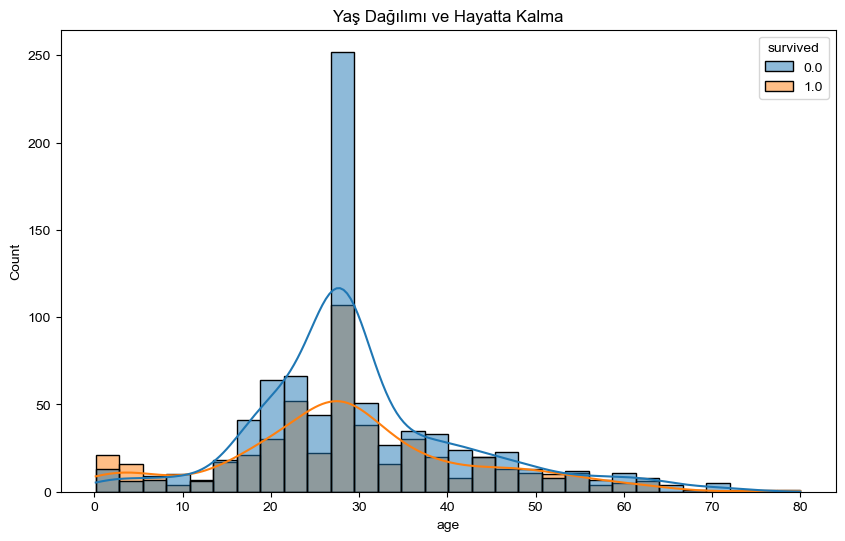

In [11]:
# Yaş dağılımına göre hayatta kalma
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Yaş Dağılımı ve Hayatta Kalma')
plt.show()

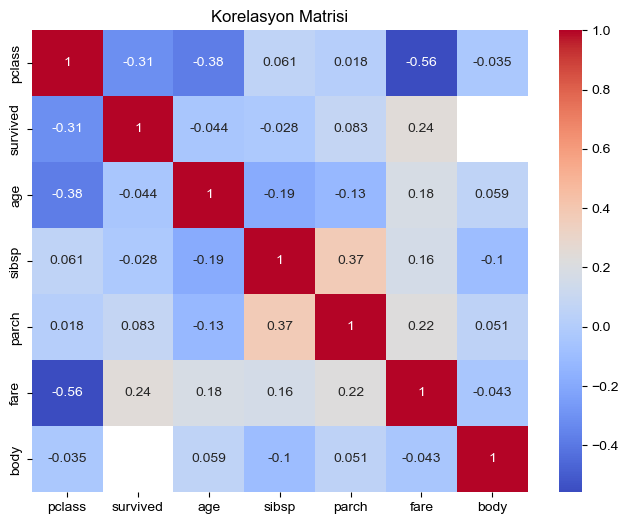

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [174]:
# Feature Engineering
#Model başarısını ciddi oranda artırıyorum.
#Titanic veri setinde, sade haliyle model %70 civarı başarı verirken,
#Doğru özellik çıkarımıyla bu oran %70+ seviyelerine çıkarmaya çalışıyorum.
#“Çöp girerse, çöp çıkar” (garbage in, garbage out) kuralı burada geçerli.

In [13]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
# Name kolonundan ünvanları (Mr, Mrs, Miss, vs.) çıkartım.
df['Title'] = df['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Name: count, dtype: int64

In [15]:
# Ünvanları Guruplandırdım.
df['Title'] = df['Title'].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [16]:
#Unvanları Sayısal Değere Dönüştürdüm.
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)  # Eksik kalanları 0 yap

In [17]:
df['Title'].value_counts()

Title
1.0    757
2.0    264
3.0    198
4.0     61
5.0     29
0.0      1
Name: count, dtype: int64

In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO",2.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0


In [19]:
# Aile büyüklüğü: kardeş/eş + ebeveyn/çocuk + kendisi
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Yalnız mı? FamilySize 1 ise yalnız, değilse değil
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [20]:
# Yaş değişkenleri kategorize ettim..
def age_category(age):
    if age <= 12:
        return 0  # Çocuk
    elif age <= 19:
        return 1  # Genç
    elif age <= 59:
        return 2  # Yetişkin
    else:
        return 3  # Yaşlı

df['AgeCategory'] = df['age'].apply(age_category)

In [21]:
# Ücret (Fare) değişkenini kategorilere ayaraladım.
df['FareCategory'] = pd.qcut(df['fare'], 4, labels=False)

In [22]:
df[['age', 'AgeCategory', 'fare', 'FareCategory']].head(10)

,age,AgeCategory,fare,FareCategory
0,29.0000,2,211.3375,3.0
1,0.9167,0,151.5500,3.0
2,2.0000,0,151.5500,3.0
3,30.0000,2,151.5500,3.0
4,25.0000,2,151.5500,3.0
5,48.0000,2,26.5500,2.0
6,63.0000,3,77.9583,3.0
7,39.0000,2,0.0000,0.0
8,53.0000,2,51.4792,3.0
9,71.0000,3,49.5042,3.0


In [23]:
# Makine öğrenmesi modelim.

In [24]:
# Özellikleri ve Hedef değişkenleri belirledim.
# Kullanacağımız sütunlar.
features = ['pclass', 'sex', 'AgeCategory', 'FareCategory', 'Title', 'FamilySize', 'IsAlone']

# Cinsiyeti sayısal hale getirdim.
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['survived']

In [25]:
# Veriyi Eğitim/Test Olarak Ayıraladım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Modeli Eğittim.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Sadece hem X hem y eksiksiz olan satırları al
#df_model = df[features + ['survived']].dropna()

 #Ardından X ve y'yi tekrar oluştur
#X = df_model[features]
#y = df_model['survived']

In [28]:
df[features + ['survived']].isnull().sum()

pclass          1
sex             1
AgeCategory     0
FareCategory    2
Title           0
FamilySize      1
IsAlone         0
survived        0
dtype: int64

In [29]:
# Başarıları ölçtüm.
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7824427480916031

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.82       150
         1.0       0.82      0.63      0.71       112

    accuracy                           0.78       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.79      0.78      0.78       262


Confusion Matrix:
 [[134  16]
 [ 41  71]]


In [31]:
#  1.Sınıf Kadınların seneryolara göre tahminlemesi.
import pandas as pd

test_data = pd.DataFrame([
    # 1. Sınıf Kadın
    {'pclass': 0, 'sex': 1, 'AgeCategory': 0, 'FareCategory': 2, 'Title': 0, 'FamilySize': 3, 'IsAlone': 0},
    {'pclass': 0, 'sex': 1, 'AgeCategory': 0, 'FareCategory': 2, 'Title': 1, 'FamilySize': 3, 'IsAlone': 0},
    {'pclass': 1, 'sex': 1, 'AgeCategory': 1, 'FareCategory': 3, 'Title': 1, 'FamilySize': 1, 'IsAlone': 0},
    {'pclass': 1, 'sex': 1, 'AgeCategory': 1, 'FareCategory': 2, 'Title': 0, 'FamilySize': 0, 'IsAlone': 0},
    {'pclass': 2, 'sex': 1, 'AgeCategory': 2, 'FareCategory': 2, 'Title': 0, 'FamilySize': 0, 'IsAlone': 0},
    {'pclass': 2, 'sex': 1, 'AgeCategory': 2, 'FareCategory': 2, 'Title': 1, 'FamilySize': 0, 'IsAlone': 0},
    {'pclass': 3, 'sex': 1, 'AgeCategory': 3, 'FareCategory': 2, 'Title': 0, 'FamilySize': 0, 'IsAlone': 0},
    {'pclass': 3, 'sex': 1, 'AgeCategory': 3, 'FareCategory': 2, 'Title': 1, 'FamilySize': 0, 'IsAlone': 0}
])

# Tahminleri yapıyorum.
predictions = model.predict(test_data)

# Sonuçları gösteriyorum.
for i, result in enumerate(predictions, 1):
    print(f"{i}. Yolcu → {'Hayatta kaldı ✅' if result == 1 else 'Hayatta kalamadı ❌'}")

1. Yolcu → Hayatta kaldı ✅
2. Yolcu → Hayatta kaldı ✅
3. Yolcu → Hayatta kaldı ✅
4. Yolcu → Hayatta kaldı ✅
5. Yolcu → Hayatta kaldı ✅
6. Yolcu → Hayatta kaldı ✅
7. Yolcu → Hayatta kalamadı ❌
8. Yolcu → Hayatta kalamadı ❌
